In [ ]:
!pip install rdkit-pypi
!pip install mordred

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.8/128.8 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.5 MB/s eta 0:00:00
  Created wheel for mordred: filename=mordred-1.2.0-py3-none-any.whl size=176720 sha256=b40fc09c0b4128e92faf1013357e6c62eec4730e1fa7c596a488c3f28a07cead
  Stored in directory: /root/.cache/pip/wheels/a7/4f/b8/d4c6591f6ac944aaced7865b349477695f662388ad958743c7
Successfully built mordred
  Attempting uninstall: networkx
    Found existing installation: networkx 3.3
    Uninstalling networkx-3.3:
      Successfully uninstalled networkx-3.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.2.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_mach

In [ ]:
# https://www.rdkit.org/
#https://github.com/rdkit/rdkit
from rdkit.Chem import AllChem
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors

# https://pandas.pydata.org
import pandas as pd

# https://numpy.org/doc/stable/release.html
import numpy as np

#https://github.com/mordred-descriptor/mordred
from mordred import Calculator, descriptors

In [ ]:
dataset = pd.read_excel('glass_tran_dataset.xlsx')
dataset

,Name,Formula,#CH3,#CH2,#CH,#C,#OH,#C-O-C,#O=C,DBA,#N,#Hal,O:C,M / g/mol,Tm / K,Tg / K,Tg/Tm,SMILES
0,glucose,C6H12O6,0,1,4,1,5,0,1,1,0,0,1.000000,180.0,419.00,303.0,0.723150,C(C1C(C(C(C(O1)O)O)O)O)O
1,glucose,C6H12O6,0,1,4,1,5,0,1,1,0,0,1.000000,180.0,414.00,290.0,0.700483,C(C1C(C(C(C(O1)O)O)O)O)O
2,glucose,C6H12O6,0,1,4,1,5,0,1,1,0,0,1.000000,180.0,432.90,309.0,0.713791,C(C1C(C(C(C(O1)O)O)O)O)O
3,glucose,C6H12O6,0,1,4,1,5,0,1,1,0,0,1.000000,180.0,419.15,309.0,0.737206,C(C1C(C(C(C(O1)O)O)O)O)O
4,glucose,C6H12O6,0,1,4,1,5,0,1,1,0,0,1.000000,180.0,414.00,290.0,0.700483,C(C1C(C(C(C(O1)O)O)O)O)O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,Nilutamide,C12H10F3N3O4,2,0,3,7,0,0,4,7,3,3,0.333333,317.0,428.00,306.0,0.714953,CC1(C(=O)N(C(=O)N1)C2=CC(=C(C=C2)[N+](=O)[O-])...
631,Aceclofenac,C16H13Cl2NO4,0,2,7,7,1,1,2,10,1,2,0.250000,354.0,426.00,283.0,0.664319,C1=CC=C(C(=C1)CC(=O)OCC(=O)O)NC2=C(C=CC=C2Cl)Cl
632,Miconazole,C18H14Cl4N2O,0,2,10,6,0,1,0,11,2,4,0.055556,416.0,359.00,274.0,0.763231,C1=CC(=C(C=C1Cl)Cl)COC(CN2C=CN=C2)C3=C(C=C(C=C...
633,Flurbiprofen,C15H13FO2,1,0,9,5,1,0,1,9,0,1,0.133333,244.0,388.00,267.0,0.688144,CC(C1=CC(=C(C=C1)C2=CC=CC=C2)F)C(=O)O


**Generate canonical SMILES**

In [ ]:
# There might be one or more valid SMILES that can represent one compound
# Thanks to Pat Walters for this information,checkout his excellent blog: https://www.blogger.com/profile/18223198920629617711
def canonical_smiles(smiles):
    mols = [Chem.MolFromSmiles(smi) for smi in smiles]
    smiles = [Chem.MolToSmiles(mol) for mol in mols]
    return smiles

In [ ]:
# Canonical SMILES
Canon_SMILES = canonical_smiles(dataset.SMILES)
len(Canon_SMILES)

635

In [ ]:
# Put the smiles in the dataframe
dataset['SMILES'] = Canon_SMILES
dataset

,Name,Formula,#CH3,#CH2,#CH,#C,#OH,#C-O-C,#O=C,DBA,#N,#Hal,O:C,M / g/mol,Tm / K,Tg / K,Tg/Tm,SMILES
0,glucose,C6H12O6,0,1,4,1,5,0,1,1,0,0,1.000000,180.0,419.00,303.0,0.723150,OCC1OC(O)C(O)C(O)C1O
1,glucose,C6H12O6,0,1,4,1,5,0,1,1,0,0,1.000000,180.0,414.00,290.0,0.700483,OCC1OC(O)C(O)C(O)C1O
2,glucose,C6H12O6,0,1,4,1,5,0,1,1,0,0,1.000000,180.0,432.90,309.0,0.713791,OCC1OC(O)C(O)C(O)C1O
3,glucose,C6H12O6,0,1,4,1,5,0,1,1,0,0,1.000000,180.0,419.15,309.0,0.737206,OCC1OC(O)C(O)C(O)C1O
4,glucose,C6H12O6,0,1,4,1,5,0,1,1,0,0,1.000000,180.0,414.00,290.0,0.700483,OCC1OC(O)C(O)C(O)C1O
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630,Nilutamide,C12H10F3N3O4,2,0,3,7,0,0,4,7,3,3,0.333333,317.0,428.00,306.0,0.714953,CC1(C)NC(=O)N(c2ccc([N+](=O)[O-])c(C(F)(F)F)c2...
631,Aceclofenac,C16H13Cl2NO4,0,2,7,7,1,1,2,10,1,2,0.250000,354.0,426.00,283.0,0.664319,O=C(O)COC(=O)Cc1ccccc1Nc1c(Cl)cccc1Cl
632,Miconazole,C18H14Cl4N2O,0,2,10,6,0,1,0,11,2,4,0.055556,416.0,359.00,274.0,0.763231,Clc1ccc(COC(Cn2ccnc2)c2ccc(Cl)cc2Cl)c(Cl)c1
633,Flurbiprofen,C15H13FO2,1,0,9,5,1,0,1,9,0,1,0.133333,244.0,388.00,267.0,0.688144,CC(C(=O)O)c1ccc(-c2ccccc2)c(F)c1


In [ ]:
# Create a list for duplicate smiles
duplicates_smiles = dataset[dataset['SMILES'].duplicated()]['SMILES'].values
len(duplicates_smiles)

267

In [ ]:
# Create a list for duplicate smiles
dataset[dataset['SMILES'].isin(duplicates_smiles)].sort_values(by=['SMILES'])

,Name,Formula,#CH3,#CH2,#CH,#C,#OH,#C-O-C,#O=C,DBA,#N,#Hal,O:C,M / g/mol,Tm / K,Tg / K,Tg/Tm,SMILES
167,norethylnodrel,C20H26O2,1,9,4,6,1,0,1,8,0,0,0.100000,298.0,453.00,324.0,0.715232,C#CC1(O)CCC2C3CCC4=C(CCC(=O)C4)C3CCC21C
168,norethylnodrel,C20H26O2,1,9,4,6,1,0,1,8,0,0,0.100000,298.0,453.00,324.0,0.715232,C#CC1(O)CCC2C3CCC4=C(CCC(=O)C4)C3CCC21C
215,decalin,C10H18,0,8,2,0,0,0,0,2,0,0,0.000000,138.0,233.15,137.4,0.589320,C1CCC2CCCCC2C1
216,decalin,C10H18,0,8,2,0,0,0,0,2,0,0,0.000000,138.0,233.15,137.4,0.589320,C1CCC2CCCCC2C1
524,ethacrynic acid,C13H12Cl2O4,1,3,2,7,1,1,2,7,0,2,0.307692,303.0,398.00,282.0,0.708543,C=C(CC)C(=O)c1ccc(OCC(=O)O)c(Cl)c1Cl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222,o-terphenyl,C18H14,0,0,14,4,0,0,0,12,0,0,0.000000,230.0,329.35,245.9,0.746622,c1ccc(-c2ccccc2-c2ccccc2)cc1
223,o-terphenyl,C18H14,0,0,14,4,0,0,0,12,0,0,0.000000,230.0,329.35,246.0,0.746926,c1ccc(-c2ccccc2-c2ccccc2)cc1
224,o-terphenyl,C18H14,0,0,14,4,0,0,0,12,0,0,0.000000,230.0,331.50,247.7,0.747210,c1ccc(-c2ccccc2-c2ccccc2)cc1
225,o-terphenyl,C18H14,0,0,14,4,0,0,0,12,0,0,0.000000,230.0,329.00,245.0,0.744681,c1ccc(-c2ccccc2-c2ccccc2)cc1


**Dropping the duplicate smiles**

In [ ]:
dataset_new = dataset.drop_duplicates(subset=['SMILES'])
len(dataset_new)

368

In [ ]:
compl_data = dataset_new.drop(['Name', 'Formula','M / g/mol','Tm / K','Tg / K','Tg/Tm ','SMILES'], axis=1)
y = compl_data.to_numpy()
comple_data = pd.DataFrame(y,columns=compl_data.columns)
comple_data

,#CH3,#CH2,#CH,#C,#OH,#C-O-C,#O=C,DBA,#N,#Hal,O:C
0,0.0,1.0,4.0,1.0,5.0,0.0,1.0,1.0,0.0,0.0,1.000000
1,0.0,0.0,2.0,2.0,4.0,0.0,2.0,2.0,0.0,0.0,1.500000
2,0.0,2.0,1.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,1.000000
3,0.0,3.0,1.0,3.0,3.0,0.0,3.0,3.0,0.0,0.0,0.857143
4,0.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.000000
...,...,...,...,...,...,...,...,...,...,...,...
363,2.0,0.0,3.0,7.0,0.0,0.0,4.0,7.0,3.0,3.0,0.333333
364,0.0,2.0,7.0,7.0,1.0,1.0,2.0,10.0,1.0,2.0,0.250000
365,0.0,2.0,10.0,6.0,0.0,1.0,0.0,11.0,2.0,4.0,0.055556
366,1.0,0.0,9.0,5.0,1.0,0.0,1.0,9.0,0.0,1.0,0.133333


**Generating Descriptors from SMILES(200 descriptors)**

In [ ]:
def RDkit_descriptors(smiles):
    mols = [Chem.MolFromSmiles(i) for i in smiles]
    calc = MoleculeDescriptors.MolecularDescriptorCalculator([x[0] for x in Descriptors._descList])
    desc_names = calc.GetDescriptorNames()

    Mol_descriptors =[]
    for mol in mols:
        # add hydrogens to molecules
        mol=Chem.AddHs(mol)
        # Calculate all 200 descriptors for each molecule
        descriptors = calc.CalcDescriptors(mol)
        Mol_descriptors.append(descriptors)
    return Mol_descriptors,desc_names

# Function call
Mol_descriptors,desc_names = RDkit_descriptors(dataset_new['SMILES'])

In [ ]:
df_with_200_descriptors = pd.DataFrame(Mol_descriptors,columns=desc_names)
df_with_200_descriptors

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,7.905417,-3.862917,7.905417,3.593267,0.290153,180.156,168.060,180.063388,72,0,...,0,0,0,0,0,0,0,0,0,0
1,10.896164,-3.491435,10.896164,1.962824,0.365229,150.086,144.038,150.016438,58,0,...,0,0,0,0,0,0,0,0,0,0
2,11.352605,-3.974190,11.352605,2.180967,0.526728,176.124,168.060,176.032088,68,0,...,0,0,0,0,0,0,0,0,0,0
3,11.593171,-4.196852,11.593171,2.243568,0.544148,190.151,180.071,190.047738,74,0,...,0,0,0,0,0,0,0,0,0,0
4,7.125000,-3.302083,7.125000,3.264583,0.381494,92.094,84.030,92.047344,38,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,13.464919,-5.712946,13.464919,0.631535,0.514937,317.223,307.143,317.062340,118,0,...,0,0,0,0,0,0,0,0,0,1
364,12.583532,-3.677997,12.583532,0.032930,0.769662,354.189,341.085,353.022163,120,0,...,0,0,0,0,0,0,0,0,0,0
365,9.093286,-3.708947,9.093286,0.062437,0.461691,416.135,402.023,413.986024,130,0,...,0,0,0,0,0,0,0,0,0,0
366,15.205721,-3.644980,15.205721,0.814564,0.893750,244.265,231.161,244.089958,92,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
r = df_with_200_descriptors.join(comple_data)

**Splitting into Train and Test data**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y_tg = dataset_new['Tg / K']  # Target for glass transition temperature

X_train_tg, X_test_tg, y_train_tg, y_test_tg = train_test_split(r, y_tg, test_size=0.10, random_state=42)

scaler = StandardScaler()

X_train_tg_scaled = scaler.fit_transform(X_train_tg)
X_test_tg_scaled = scaler.transform(X_test_tg)

# Checking the shapes of the training and testing sets
(X_train_tg_scaled.shape, X_test_tg_scaled.shape)


((331, 219), (37, 219))

**Prediction Using SMILES descriptors**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initializing models
models = {
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42),
    "Extra Trees": ExtraTreesRegressor(random_state=42)  # Extra Trees model added here
}

def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    rmse = np.sqrt(mean_squared_error(y_test, predictions))
    r2 = r2_score(y_test, predictions)
    return mae, rmse, r2

In [ ]:
results_tg = {}
for name, model in models.items():
    mae, rmse, r2 = train_and_evaluate_model(model, X_train_tg_scaled, y_train_tg, X_test_tg_scaled, y_test_tg)
    results_tg[name] = {"MAE": mae, "RMSE": rmse, "R^2": r2}
results_tg

print("Model Performance for Tg Prediction:")
print("-" * 60)
for model_name, metrics in results_tg.items():
    print(f"Model: {model_name}")
    print(f"    MAE: {metrics['MAE']:.4f}")
    print(f"    RMSE: {metrics['RMSE']:.4f}")
    print(f"    R^2: {metrics['R^2']:.4f}")
    print("-" * 60)

Model Performance for Tg Prediction:
------------------------------------------------------------
Model: Random Forest
    MAE: 14.2512
    RMSE: 20.1972
    R^2: 0.9542
------------------------------------------------------------
Model: Gradient Boosting
    MAE: 14.3426
    RMSE: 21.0976
    R^2: 0.9500
------------------------------------------------------------
Model: XGBoost
    MAE: 13.2279
    RMSE: 18.8466
    R^2: 0.9601
------------------------------------------------------------
Model: Extra Trees
    MAE: 12.3550
    RMSE: 18.1562
    R^2: 0.9630
------------------------------------------------------------


**Neutral Network (CNN)**

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               26752     
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 37121 (145.00 KB)
Trainable params: 37121 (145.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/800
3/3 [==============================] - 2s 225ms/step - loss: 60670.6875 - mae: 228.9897 - mse: 60670.6875 - val_loss: 64691.2969 - val_mae

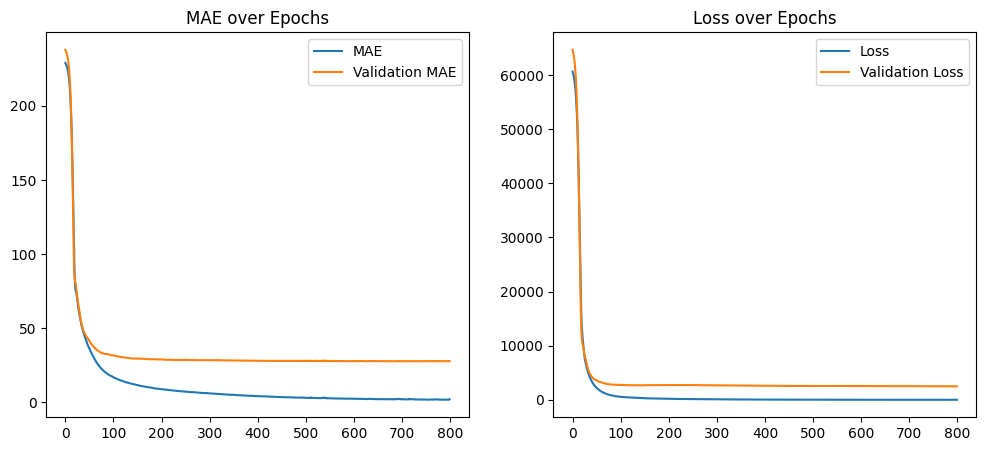

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

# Define the neural network structure
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_tg_scaled.shape[1],)),  # Input layer
    Dense(64, activation='relu'),  # Hidden layer
    Dense(32, activation='relu'),  # Additional hidden layer
    Dense(1)  # Output layer for regression
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mae', 'mse'])

# Print model summary
model.summary()

# Train the model
history = model.fit(X_train_tg_scaled, y_train_tg, epochs=800, batch_size=100, validation_split=0.2, verbose=1)

# Evaluate the model on the test set
test_loss, test_mae, test_mse = model.evaluate(X_test_tg_scaled, y_test_tg, verbose=0)

# Predict using the trained model
test_predictions = model.predict(X_test_tg_scaled).flatten()

# Calculate R^2 score
test_r2 = r2_score(y_test_tg, test_predictions)

print(f"Test MAE: {test_mae:.4f}, Test MSE: {test_mse:.4f}, Test R^2: {test_r2:.4f}")

# Optionally, plot the training progress
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE over Epochs')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.legend()
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define a parameter grid to search over
param_grid = {
    'max_depth': [3],
    'n_estimators': [150],
    'learning_rate': [0.2],
    'subsample': [0.8],
    'colsample_bytree': [0.9]
}

# Initialize the XGBRegressor
xgb = XGBRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Perform the grid search on the training data
grid_search.fit(X_train_tg_scaled, y_train_tg)

# Get the best parameters
best_parameters = grid_search.best_params_

# Train a new XGBRegressor using the best parameters from the grid search
best_xgb = XGBRegressor(**best_parameters)
best_xgb.fit(X_train_tg_scaled, y_train_tg)

best_predictions = best_xgb.predict(X_test_tg_scaled)

# Predict on the test set with the best model
best_rmse = np.sqrt(mean_squared_error(y_test_tg, best_predictions))

# Calculate R^2 score with the best model
best_r2 = r2_score(y_test_tg, best_predictions)

# Calculate MAE with the best model
best_mae = mean_absolute_error(y_test_tg, best_predictions)

print("Best Parameters:", best_parameters)
print("Best RMSE:", best_rmse)
print("Best R^2 Score:", best_r2)
print("Best MAE:", best_mae)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.8s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.8; total time=   2.0s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.4s
[CV] END colsample_bytree=0.9, learning_rate=0.2, max_depth=3, n_estimators=150, subsample=0.8; total time=   0.4s
Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Best RMSE: 21.174884774231842
Best R^2 Score: 0.9496089818630185
Best MAE: 15.418976159997888


**Testing the model**

In [ ]:
def predict_glass_transition_temperature(input_features):
    # Scale the input features using the previously fitted scaler
    # input_scaled = scaler.transform(input_df)

    # Predict using the trained model
    predicted_tg = best_xgb.predict(input_features)

    return predicted_tg[0]

data = [['N#N'], ['CN=C=O'],['C(C1C(C(C(C(O1)O)O)O)O)O'],
['C(C1C(C(C(C(O1)O)O)O)O)O'],
['O=C(O)C(O)C(O)C(=O)O'],
['C(C(CC(=O)O)C(=O)O)C(=O)O'],
['C(CC(=O)O)C(CC(=O)O)C(=O)O'],
['OCC(O)CO'],
['C1C(C(C(C(O1)O)O)O)O'],
['OCC'],
['CCCO'],
['CO'],
['OCCO'],
['O=C1OC(C2=C1C=CC=C2)(C3=CC=C(C=C3)O[H])C4=CC=C(C=C4)O[H]'],
['C(C1C(C(C(C(O1)OC(C(CO)O)C(C(CO)O)O)O)O)O)O'],
['CCC(=O)C1=C(C=C(C=C1O)O)O'],
['CC(C)CO'],
['CCCCCCO'],
['CCCCCO'],
['c1ccc(cc1)CO'],
['CC(O)CO']]
df = pd.DataFrame(data, columns=['SMILES'])
input_df,desc_names =  RDkit_descriptors(df['SMILES'])
input_df = pd.DataFrame(input_df,columns=desc_names)


#CH3	#CH2	#CH	#C	#OH	#C-O-C	#O=C	DBA	#N	#Hal	O:C	M / g/mol	#S	#branching
predicted_tg = predict_glass_transition_temperature(input_df.iloc[4:5])
print("Predicted Glass Transition Temperature:", predicted_tg)


Predicted Glass Transition Temperature: 357.10242


In [ ]:
input_df.iloc[2:3]

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
2,7.905417,-3.862917,7.905417,3.593267,0.290153,180.156,168.06,180.063388,72,0,...,0,0,0,0,0,0,0,0,0,0
